In [1]:
#import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#read the data set
data = pd.read_csv("Uber Request Data.csv")

In [4]:
#Print the head of the data frame.
data.head()

Request id Pickup point  Driver id          Status    Request timestamp  \
0         619      Airport        1.0  Trip Completed      11/7/2016 11:51   
1         867      Airport        1.0  Trip Completed      11/7/2016 17:57   
2        1807         City        1.0  Trip Completed       12/7/2016 9:17   
3        2532      Airport        1.0  Trip Completed      12/7/2016 21:08   
4        3112         City        1.0  Trip Completed  13-07-2016 08:33:16   

        Drop timestamp  
0      11/7/2016 13:00  
1      11/7/2016 18:47  
2       12/7/2016 9:58  
3      12/7/2016 22:03  
4  13-07-2016 09:25:47

In [5]:
#print the information of variables to check their data types.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [6]:
data["Request timestamp"].describe()

count                6745
unique               5618
top       11/7/2016 19:02
freq                    6
Name: Request timestamp, dtype: object

In [7]:
data["Drop timestamp"].describe()

count                2831
unique               2598
top       11/7/2016 13:00
freq                    4
Name: Drop timestamp, dtype: object

In [8]:
#converting request timestamp to Datetime format
data["Request timestamp"] = pd.DatetimeIndex(data["Request timestamp"])
data.head()

Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-11-07 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-11-07 17:57:00   
2        1807         City        1.0  Trip Completed 2016-12-07 09:17:00   
3        2532      Airport        1.0  Trip Completed 2016-12-07 21:08:00   
4        3112         City        1.0  Trip Completed 2016-07-13 08:33:16   

        Drop timestamp  
0      11/7/2016 13:00  
1      11/7/2016 18:47  
2       12/7/2016 9:58  
3      12/7/2016 22:03  
4  13-07-2016 09:25:47

In [9]:
#converting drop timestamp to Datetime format
data["Drop timestamp"] = pd.DatetimeIndex(data["Drop timestamp"])
data.head()

Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-11-07 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-11-07 17:57:00   
2        1807         City        1.0  Trip Completed 2016-12-07 09:17:00   
3        2532      Airport        1.0  Trip Completed 2016-12-07 21:08:00   
4        3112         City        1.0  Trip Completed 2016-07-13 08:33:16   

       Drop timestamp  
0 2016-11-07 13:00:00  
1 2016-11-07 18:47:00  
2 2016-12-07 09:58:00  
3 2016-12-07 22:03:00  
4 2016-07-13 09:25:47

In [10]:
#Dropping unwanted columns
inp0 = data.drop(["Request id", "Driver id", "Drop timestamp"], axis = 1)
inp0.head()

Pickup point          Status   Request timestamp
0      Airport  Trip Completed 2016-11-07 11:51:00
1      Airport  Trip Completed 2016-11-07 17:57:00
2         City  Trip Completed 2016-12-07 09:17:00
3      Airport  Trip Completed 2016-12-07 21:08:00
4         City  Trip Completed 2016-07-13 08:33:16

In [11]:
inp0.Status.unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [12]:
session_labels = ['Late Night','Early Morning','Late Morning','Afternoon','Evening','Night']
inp0 = inp0.assign(session=pd.cut(inp0["Request timestamp"].dt.hour,[-1,4,8,12,16,20,24],labels=session_labels))
inp0.head()

Pickup point          Status   Request timestamp        session
0      Airport  Trip Completed 2016-11-07 11:51:00   Late Morning
1      Airport  Trip Completed 2016-11-07 17:57:00        Evening
2         City  Trip Completed 2016-12-07 09:17:00   Late Morning
3      Airport  Trip Completed 2016-12-07 21:08:00          Night
4         City  Trip Completed 2016-07-13 08:33:16  Early Morning

Session Details
Late Night: Midnight to 4AM
Early Morning: 4AM-8AM
Late Morning: 8AM-Noon
Afternoon: Noon-4PM
Evening: 4PM-8PM
Night: 8PM-Midnight

In [13]:
inp0.Status.count()

6745

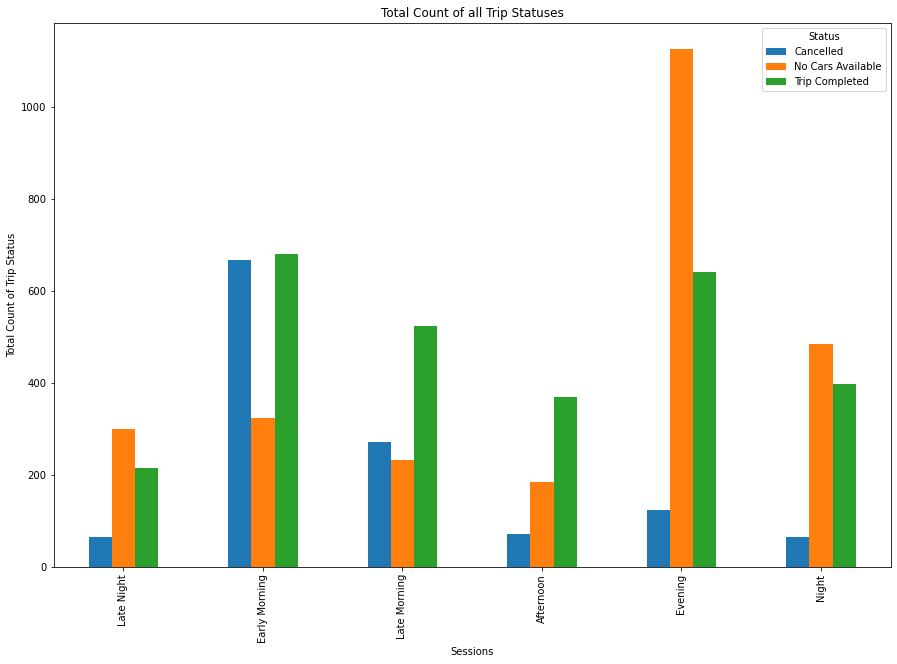

In [35]:
# plotting share/frequency of all "Trip Status" over the day to identify problem areas
inp0.groupby(['session','Status']).Status.count().unstack().plot.bar(legend=True, figsize=(15,10))
plt.xlabel('Sessions')
plt.title('Total Count of all Trip Statuses')
plt.ylabel('Total Count of Trip Status')
plt.show()

Observations

1. Number of cars cancelled is high in early morning session (4:00 am to 8:00 am) followed by late morning session (8:00 am to 12:00 pm)
2. Number cars not available is in the evening session (4:00 pm to 8:00 pm) followed by night session (8:00 pm to 12:00 am)

In [36]:
# Filtering out only "Cancelled"  trips
df_tripscancelled = inp0[inp0["Status"].str.contains('Cancelled')==True]
df_tripscancelled = df_tripscancelled.reset_index(drop=True)
df_tripscancelled.head()

Pickup point     Status   Request timestamp        session supply_demand
0         City  Cancelled 2016-07-13 06:08:41  Early Morning        Demand
1         City  Cancelled 2016-07-14 17:07:58        Evening        Demand
2      Airport  Cancelled 2016-07-14 20:51:37        Evening        Demand
3         City  Cancelled 2016-07-15 10:12:40   Late Morning        Demand
4      Airport  Cancelled 2016-12-07 19:14:00        Evening        Demand

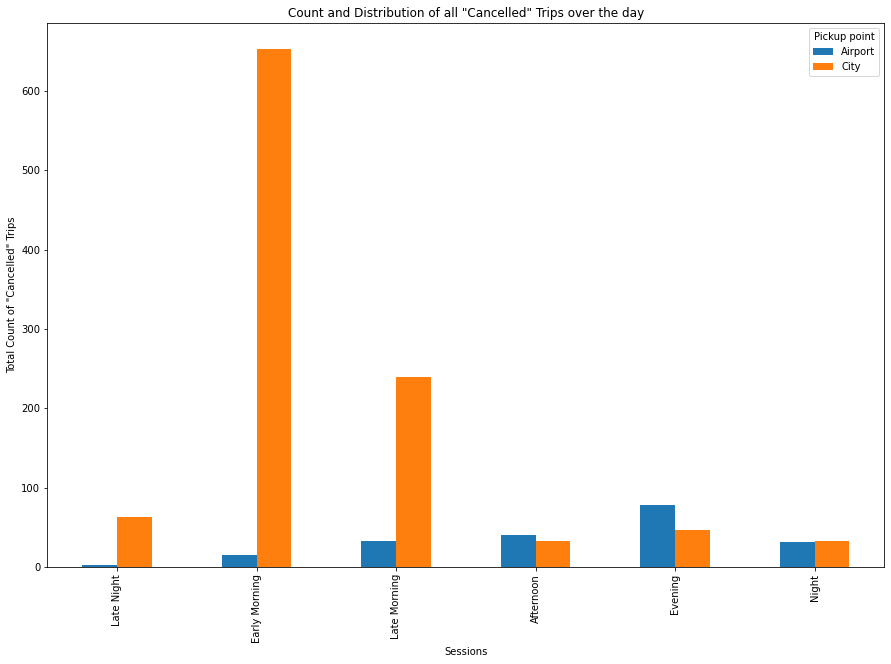

In [37]:
# plotting share/frequency of all Cancelled trips over the day to identify problem areas
df_tripscancelled.groupby(['session','Pickup point'])["Pickup point"].count().unstack().plot.bar(legend=True, figsize=(15,10))
plt.title('Count and Distribution of all "Cancelled" Trips over the day')
plt.xlabel('Sessions')
plt.ylabel('Total Count of "Cancelled" Trips')
plt.show()

Observation

Maximum cancellations happen in the "Early morning" session(4 am to 8 am) where the pickup point is City followed by "Late morning" session (8 am to 12 pm)

In [18]:
df_nocar = inp0[inp0["Status"].str.contains('No Car')==True]
df_nocar = df_nocar.reset_index(drop=True)
df_nocar.head()

Pickup point             Status   Request timestamp     session
0         City  No Cars Available 2016-11-07 00:02:00  Late Night
1         City  No Cars Available 2016-11-07 00:06:00  Late Night
2         City  No Cars Available 2016-11-07 00:09:00  Late Night
3      Airport  No Cars Available 2016-11-07 00:23:00  Late Night
4      Airport  No Cars Available 2016-11-07 00:30:00  Late Night

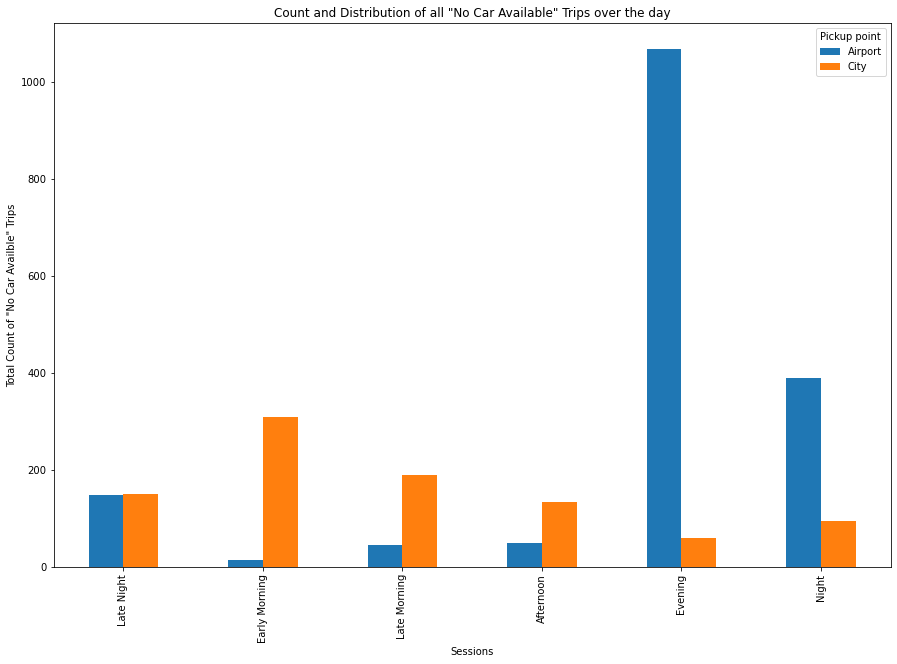

In [19]:
df_nocar.groupby(['session','Pickup point'])['Pickup point'].count().unstack().plot.bar(legend=True, figsize=(15,10))
plt.title('Count and Distribution of all "No Car Available" Trips over the day')
plt.xlabel('Sessions')
plt.ylabel('Total Count of "No Car Availble" Trips')
plt.show()

Observation:
Maximum "No Cars Available" trips happen in "Evening" (4pm to 8pm) session where the pick up is "Airport", followed by Night session (8 pm to Midnight)

In [21]:
# Filtering out trips in the City to Airport route. Pick-up Point - City
df_citytoairport = inp0[inp0["Pickup point"].str.contains('City')==True]

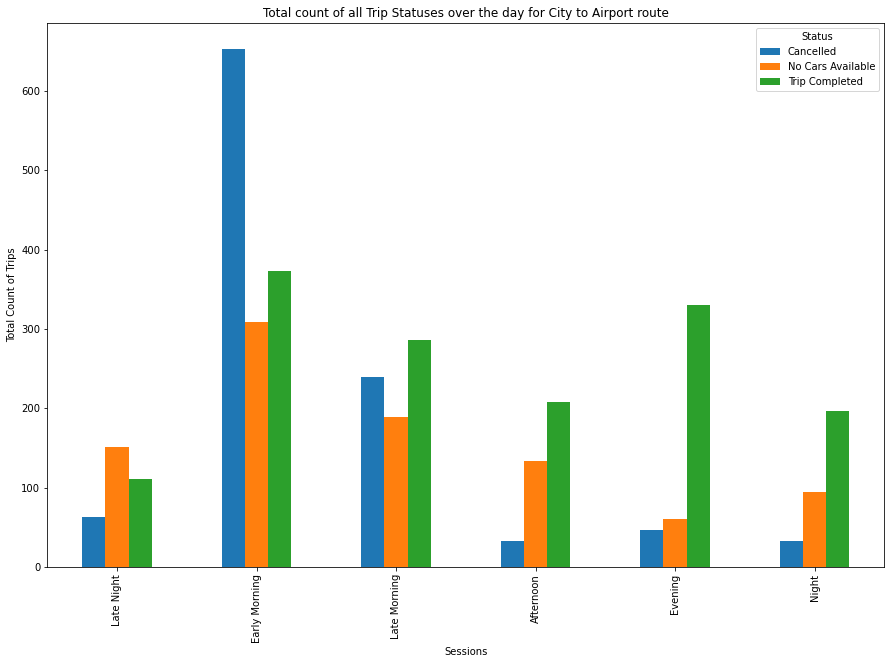

In [22]:
df_citytoairport.groupby(['session','Status']).Status.count().unstack().plot.bar(legend=True, figsize=(15,10))
plt.title('Total count of all Trip Statuses over the day for City to Airport route')
plt.xlabel('Sessions')
plt.ylabel('Total Count of Trips')
plt.show()

We see that maximum trips are cancelled from City to airport in the Early Morning session followed by Late Morning Session

In [23]:
# Filtering out trips in the Airport to route. Pick-up Point - Airport
df_airporttocity = inp0[inp0["Pickup point"].str.contains('Airport')==True]

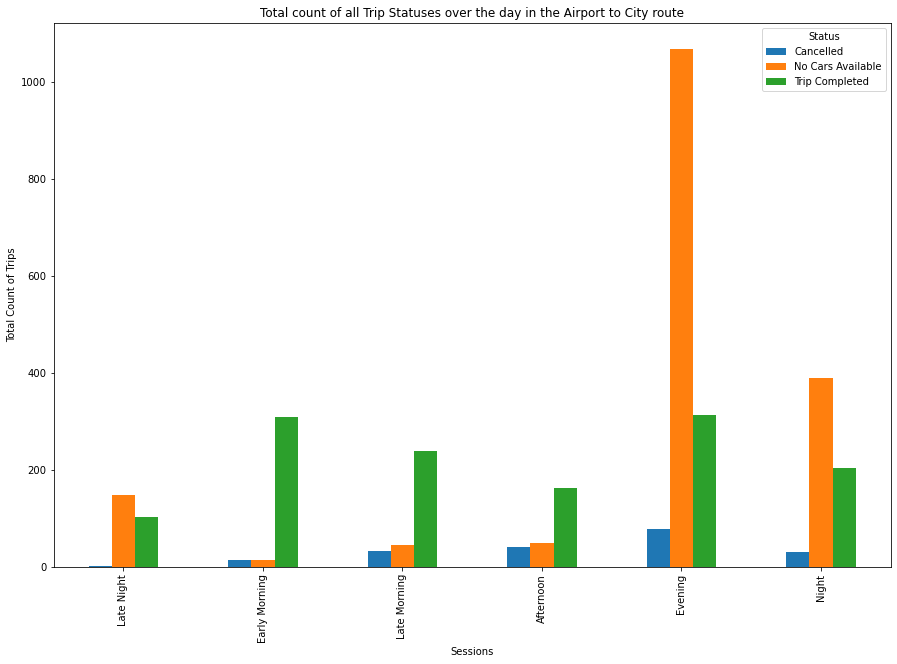

In [25]:
df_airporttocity.groupby(['session','Status']).Status.count().unstack().plot.bar(legend=True, figsize=(15,10))
plt.title('Total count of all Trip Statuses over the day in the Airport to City route')
plt.xlabel('Sessions')
plt.ylabel('Total Count of Trips')
plt.show()

We see that maximum number of "No Cars Available" from Airport to city in the Evening session followed by Night Session

In [27]:
inp0['supply_demand'] = ['Supply' if x == 'Trip Completed' else 'Demand' for x in inp0['Status']]
inp0.head()

Pickup point          Status   Request timestamp        session  \
0      Airport  Trip Completed 2016-11-07 11:51:00   Late Morning   
1      Airport  Trip Completed 2016-11-07 17:57:00        Evening   
2         City  Trip Completed 2016-12-07 09:17:00   Late Morning   
3      Airport  Trip Completed 2016-12-07 21:08:00          Night   
4         City  Trip Completed 2016-07-13 08:33:16  Early Morning   

  supply_demand  
0        Supply  
1        Supply  
2        Supply  
3        Supply  
4        Supply

In [29]:
#Plotting Supply and Demand on the City to Airport Route
df_citytoairport_supplydemand = inp0[inp0["Pickup point"].str.contains('City')==True]

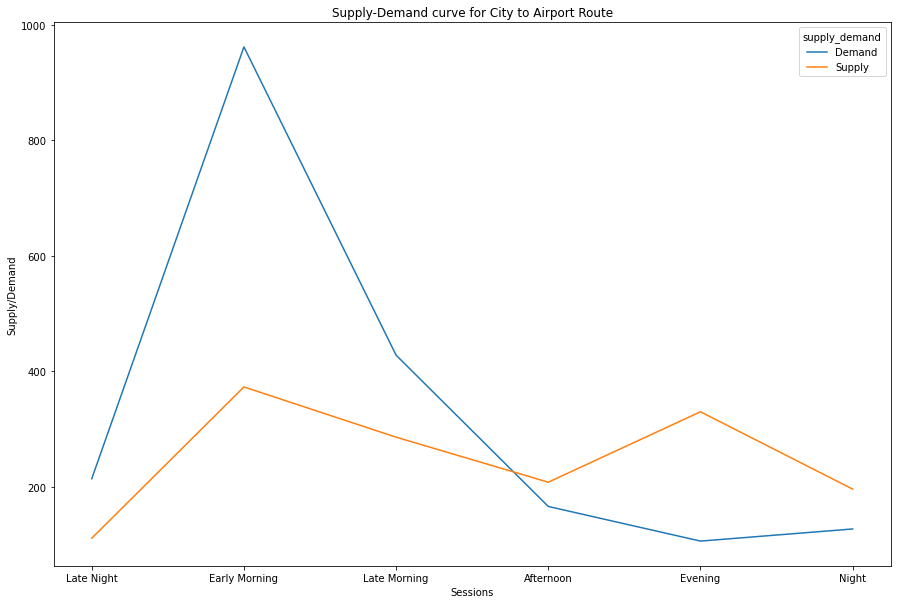

In [30]:
df_citytoairport_supplydemand.groupby(['session','supply_demand']).supply_demand.count().unstack().plot.line(legend=True, figsize=(15,10))
plt.title('Supply-Demand curve for City to Airport Route')
plt.xlabel('Sessions')
plt.ylabel('Supply/Demand')
plt.show()

We observe that the Demand is very high in the morning from City to Airport route but the supply is very low

In [32]:
#Plotting Supply and Demand on the Airport to City route
df_airporttocity_supplydemand = inp0[inp0["Pickup point"].str.contains('Airport')==True]

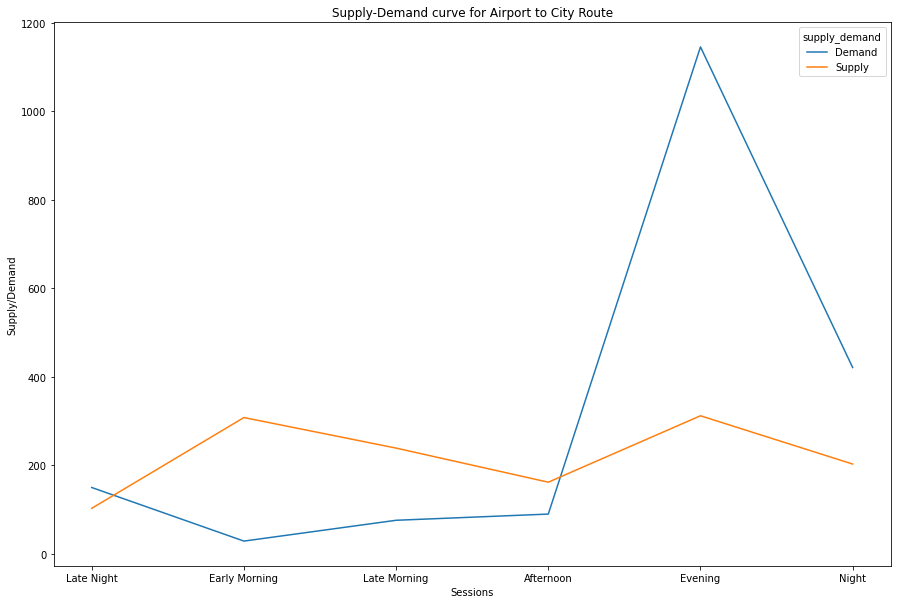

In [33]:
df_airporttocity_supplydemand.groupby(['session','supply_demand']).supply_demand.count().unstack().plot.line(legend=True, figsize=(15,10))
plt.title('Supply-Demand curve for Airport to City Route')
plt.xlabel('Sessions')
plt.ylabel('Supply/Demand')
plt.show()

We observe that the Demand is very high in the evening in the Airport to City route but the supply is very low

Correlating these two plots, a possible hypothesis could be:
The demand during morning and afternoon hours from the Airport to City is quite low, which means that a driver who completed a City to Airport route in the morning hours may have to wait a really long time to get a ride back to the City, or he may have to come back without a passenger. Both situations are not idle for drivers, which might be the reason for highest number of "Cancelled" trips in the City to Airport trip in the morning hours

The vice versa happens in evening when there are too many flight coming in to the airport and hence there is a high demand for cabs and not enough supply. which is why most number of "No Cars Available" were observed in Evening in the Airport to City route.

Possible Solution:

1. Give incentives/surge pricing/bonus for trips from City to Airport during Morning hours.
2. Give incentives/surge pricing/bonus for trips from Airport to City during Evening hours.
3. Uber can give Gas expense to drivers when they return from Airport without a ride or go to airport for pick up without a ride.